In [43]:
import numpy as np
import pandas as pd
from pyinform import *
import matplotlib.pyplot as plt
q = 10 # number for quantile binning

In [44]:
SectorReturns = pd.read_csv("NormalisedSectorReturns.csv",
                            index_col=0)
print(SectorReturns.shape)
SectorReturns.head()

(5291, 10)


,Energy,Materials,Financials,Consumer Staples,Consumer Discretionary,Utilities,Telecommunications Services,Information Technology,Industrials,Health Care
Date,,,,,,,,,,
1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
DF = SectorReturns.dropna()
DF.head()

,Energy,Materials,Financials,Consumer Staples,Consumer Discretionary,Utilities,Telecommunications Services,Information Technology,Industrials,Health Care
Date,,,,,,,,,,
1992-02-25,0.598655,-0.362595,-1.813326,-0.608180,-0.314499,-1.131099,-1.320868,-2.456540,0.725513,-1.709158
1992-02-26,1.482999,-0.536391,-1.203702,0.689234,1.158635,-0.013335,-0.304987,-1.497377,1.245510,0.459472
1992-02-27,1.932779,0.151317,0.188633,-0.021304,0.493030,-0.020952,-0.525962,-1.382264,0.621771,0.212791
1992-02-28,2.264313,0.003429,0.687197,0.274232,0.662564,-0.456263,-0.332417,-1.703039,0.413180,-0.870169
1992-03-02,1.119821,1.108068,1.012923,0.143172,0.636739,-0.686971,-0.686194,-1.379845,0.883358,-1.242292


# Get Quantile-Binning

In [46]:


def QuantileBin(DF, q):
    out = pd.DataFrame()

    for i in DF.columns:
        x = DF[i]
        out[i] = pd.qcut(x, q, labels = range(q))
    return(out)

QDF = QuantileBin(DF, q)

# Transfer Entropy

Via package pyinform in https://www.researchgate.net/publication/323135385_Inform_A_toolkit_for_information-theoretic_analysis_of_complex_systems

cite at
https://ieeexplore.ieee.org/document/8285197

Documentation:
https://elife-asu.github.io/PyInform/_modules/pyinform/transferentropy.html

In [47]:
def CausalTE(QDF, k=1):
    m = QDF.shape[1]
    Causality = np.zeros((m,m))

    for i in range(m):
        for j in range(m):
            I, J = QDF.columns[i], QDF.columns[j]
            Cij = transfer_entropy(source=QDF[I],
                            target = QDF[J], k=k)
            Causality[i,j] = Cij
    return(Causality)

In [48]:
Causality = CausalTE(QDF)

In [49]:
Causality

array([[0.        , 0.1106094 , 0.11028298, 0.11416504, 0.10649852,
        0.10928085, 0.11915576, 0.10410655, 0.11080965, 0.11582272],
       [0.11688708, 0.        , 0.10443991, 0.11762985, 0.11402529,
        0.11591317, 0.11757031, 0.10503085, 0.11697789, 0.1091374 ],
       [0.10602941, 0.10990658, 0.        , 0.11143606, 0.12079043,
        0.11875931, 0.11198724, 0.10736253, 0.11485436, 0.11824812],
       [0.11293208, 0.11471382, 0.11096845, 0.        , 0.10961608,
        0.11694625, 0.12044046, 0.10327741, 0.10743332, 0.11154024],
       [0.11411013, 0.11137429, 0.11061542, 0.12449544, 0.        ,
        0.11488691, 0.11875823, 0.11157687, 0.11449599, 0.11732439],
       [0.10459401, 0.10675525, 0.11174481, 0.11967293, 0.11061541,
        0.        , 0.10878308, 0.10827732, 0.1198965 , 0.11509617],
       [0.10512736, 0.10361199, 0.10009468, 0.10944855, 0.10896659,
        0.12396321, 0.        , 0.11297866, 0.10686218, 0.1145536 ],
       [0.1110606 , 0.10084776, 0.0984597

# Random Transfer Entropy

In [50]:
def Random(DF):

    out = pd.DataFrame()

    for i in DF.columns:
        out[i] = np.random.permutation(DF[i].values)

    out.index = DF.index
    return(out)

In [51]:
QDF.head()

,Energy,Materials,Financials,Consumer Staples,Consumer Discretionary,Utilities,Telecommunications Services,Information Technology,Industrials,Health Care
Date,,,,,,,,,,
1992-02-25,5,3,0,2,3,1,1,0,5,1
1992-02-26,7,3,1,5,6,4,3,1,7,5
1992-02-27,8,4,4,4,5,3,3,1,5,4
1992-02-28,9,4,5,4,5,3,3,1,4,2
1992-03-02,7,6,6,4,5,2,3,1,6,1


In [52]:
Random(QDF).head()

,Energy,Materials,Financials,Consumer Staples,Consumer Discretionary,Utilities,Telecommunications Services,Information Technology,Industrials,Health Care
Date,,,,,,,,,,
1992-02-25,4,0,8,9,7,9,3,5,8,6
1992-02-26,6,3,0,0,6,2,2,7,6,3
1992-02-27,4,4,2,4,7,2,3,1,9,0
1992-02-28,8,5,9,3,5,8,3,3,5,5
1992-03-02,2,8,8,8,3,6,2,0,6,3


In [53]:
def CompareRandom(DF, n_P, q):
    RTE = CausalTE(Random(QuantileBin(DF, q)))

    for i in range(1,n_P):

        RTE +=CausalTE(Random(QuantileBin(DF, q)))

    return(RTE/float(n_P))# mean value

In [54]:
np.random.seed(12345)
print(q)

10


In [55]:
EnsembleRTE = CompareRandom(DF, 100, q = q)
print(EnsembleRTE.round(3))

[[0.    0.121 0.12  0.121 0.12  0.121 0.12  0.121 0.12  0.119]
 [0.121 0.    0.12  0.12  0.121 0.12  0.12  0.12  0.122 0.12 ]
 [0.12  0.12  0.    0.121 0.12  0.121 0.119 0.121 0.121 0.121]
 [0.12  0.12  0.12  0.    0.12  0.12  0.12  0.12  0.121 0.12 ]
 [0.12  0.119 0.12  0.121 0.    0.12  0.12  0.121 0.12  0.12 ]
 [0.12  0.121 0.121 0.12  0.121 0.    0.12  0.121 0.12  0.119]
 [0.12  0.121 0.12  0.12  0.12  0.119 0.    0.121 0.119 0.121]
 [0.12  0.12  0.12  0.121 0.12  0.119 0.12  0.    0.119 0.12 ]
 [0.121 0.121 0.12  0.121 0.12  0.121 0.12  0.12  0.    0.12 ]
 [0.12  0.12  0.12  0.121 0.12  0.121 0.121 0.12  0.12  0.   ]]


In [56]:
RelevantTE = Causality - EnsembleRTE

In [57]:
RelevantTE.round(4)

array([[ 0.    , -0.0104, -0.0099, -0.0068, -0.0133, -0.0113, -0.0012,
        -0.017 , -0.009 , -0.0037],
       [-0.0038,  0.    , -0.0158, -0.0022, -0.0073, -0.0042, -0.0025,
        -0.015 , -0.0051, -0.0106],
       [-0.0138, -0.0105,  0.    , -0.0095,  0.0004, -0.0018, -0.0074,
        -0.0139, -0.006 , -0.0024],
       [-0.007 , -0.0052, -0.0091,  0.    , -0.01  , -0.0027,  0.0002,
        -0.0168, -0.0134, -0.0087],
       [-0.0062, -0.0077, -0.0092,  0.0035,  0.    , -0.0046, -0.0012,
        -0.0091, -0.0055, -0.0028],
       [-0.015 , -0.0141, -0.0095, -0.0008, -0.0101,  0.    , -0.0112,
        -0.0126, -0.0001, -0.0038],
       [-0.0152, -0.0172, -0.0201, -0.011 , -0.0113,  0.0046,  0.    ,
        -0.0075, -0.0121, -0.0066],
       [-0.0092, -0.0189, -0.0219, -0.0187, -0.0081,  0.0011, -0.0033,
         0.    , -0.0127, -0.014 ],
       [-0.0114, -0.0041, -0.016 , -0.0001, -0.0229, -0.0077, -0.0009,
        -0.0114,  0.    , -0.0026],
       [-0.007 , -0.0132, -0.017 , -0

In [58]:
def RelTE(q):
    return(  CausalTE(QuantileBin(DF, q = q)) - CompareRandom(DF, 100, q = q))

In [59]:
RelTE(q)

array([[ 0.        , -0.00948069, -0.00956426, -0.00631774, -0.01459661,
        -0.0114499 , -0.00017196, -0.01672628, -0.00923239, -0.00406942],
       [-0.00249212,  0.        , -0.01509424, -0.00253275, -0.00558706,
        -0.00389777, -0.0028438 , -0.01534652, -0.00294416, -0.01107079],
       [-0.01511409, -0.01004772,  0.        , -0.00819689,  0.0011107 ,
        -0.00168265, -0.0081609 , -0.01181613, -0.00583075, -0.00217563],
       [-0.00774691, -0.0055763 , -0.00919089,  0.        , -0.01107806,
        -0.00326177,  0.00016045, -0.01693558, -0.01375904, -0.00801396],
       [-0.00671497, -0.00840895, -0.00877153,  0.00421572,  0.        ,
        -0.00548349, -0.0008496 , -0.00797263, -0.00519977, -0.00259754],
       [-0.01522347, -0.01399538, -0.00780573,  0.00037892, -0.01065198,
         0.        , -0.01221067, -0.01198779,  0.00040873, -0.0053525 ],
       [-0.01470633, -0.01701508, -0.02046988, -0.0110933 , -0.01121272,
         0.00464953,  0.        , -0.00682854

In [60]:
# Compare different values of q
Q = range(4,20)
Mean = np.zeros(len(Q))
for q in Q:
    RTEq = RelTE(q)
    Mean[q-4] = sum(sum(RTEq)) / RTEq.shape[0]**2.

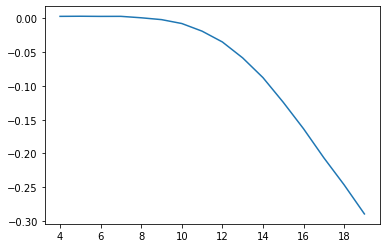

In [61]:
plt.plot(Q,Mean)
plt.show()

In [62]:
Mean

array([ 0.00270172,  0.00286439,  0.00265444,  0.00271175,  0.0005874 ,
       -0.00212351, -0.00788488, -0.01917714, -0.03515311, -0.05867793,
       -0.0878298 , -0.12430392, -0.16343697, -0.20631835, -0.24630287,
       -0.28930814])

In [63]:
# largets q with a positive mean
RTE8 = RelTE(8)

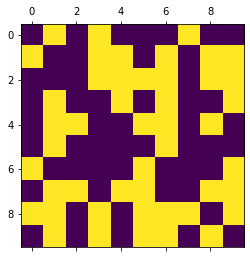

In [64]:
plt.matshow( RTE8 > 0.0)